# Statistics Assignment


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


## Part A: Normal Distribution + Empirical Rule


In [35]:
# 1) Generate a synthetic height dataset using a normal distribution (mean=170, std=10, size=200).
# 2) Plot a histogram with KDE and label axes/title.
# 3) Compute the percentage of data within 1, 2, and 3 standard deviations of the mean.
#    Print results in a small table or formatted text.


In [36]:
import sys
sys.executable


'c:\\Users\\pslha\\Downloads\\AI Training\\ai-env\\Scripts\\python.exe'

In [37]:
import scipy.stats as stats
stats.norm.mean()


np.float64(0.0)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Generate height data
np.random.seed(42)  # for reproducibility
heights = np.random.normal(loc=170, scale=10, size=200)

heights[:10]  # preview first 10 values


array([174.96714153, 168.61735699, 176.47688538, 185.23029856,
       167.65846625, 167.65863043, 185.79212816, 177.67434729,
       165.30525614, 175.42560044])

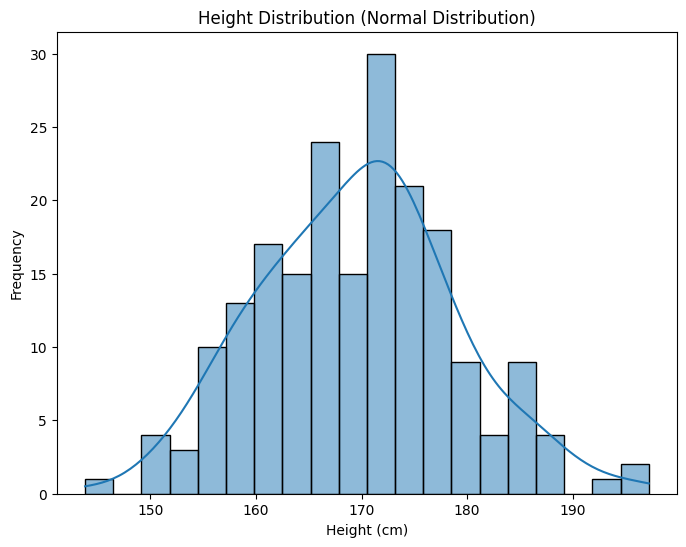

In [39]:
plt.figure(figsize=(8, 6))

sns.histplot(heights, kde=True, bins=20)

plt.xlabel("Height (cm)")
plt.ylabel("Frequency")
plt.title("Height Distribution (Normal Distribution)")
plt.show()


In [40]:
# Compute mean and standard deviation
mean = np.mean(heights)
std = np.std(heights)

# Percentages within 1, 2, and 3 standard deviations
within_1std = np.mean((heights >= mean - std) & (heights <= mean + std)) * 100
within_2std = np.mean((heights >= mean - 2*std) & (heights <= mean + 2*std)) * 100
within_3std = np.mean((heights >= mean - 3*std) & (heights <= mean + 3*std)) * 100

# Display results
print(f"Mean Height: {mean:.2f}")
print(f"Std Dev: {std:.2f}\n")

print("Percentage of data within:")
print(f"1 Std Dev: {within_1std:.2f}%")
print(f"2 Std Dev: {within_2std:.2f}%")
print(f"3 Std Dev: {within_3std:.2f}%")


Mean Height: 169.59
Std Dev: 9.29

Percentage of data within:
1 Std Dev: 69.00%
2 Std Dev: 94.00%
3 Std Dev: 100.00%


## Part B: Outliers and 3-Sigma Rule


In [41]:
# 4) Create transaction data with a normal distribution (mean=5000, std=2000, size=1000).
# 5) Add at least 3 extreme outliers, then plot the histogram with a vertical mean line.
# 6) Identify outliers using the 3-sigma rule and print them.


In [42]:
# Generate transaction data
np.random.seed(42)
transactions = np.random.normal(loc=5000, scale=2000, size=1000)

# Preview
transactions[:10]


array([5993.42830602, 4723.47139766, 6295.3770762 , 8046.05971282,
       4531.69325055, 4531.7260861 , 8158.42563101, 6534.86945831,
       4061.05122813, 6085.12008717])

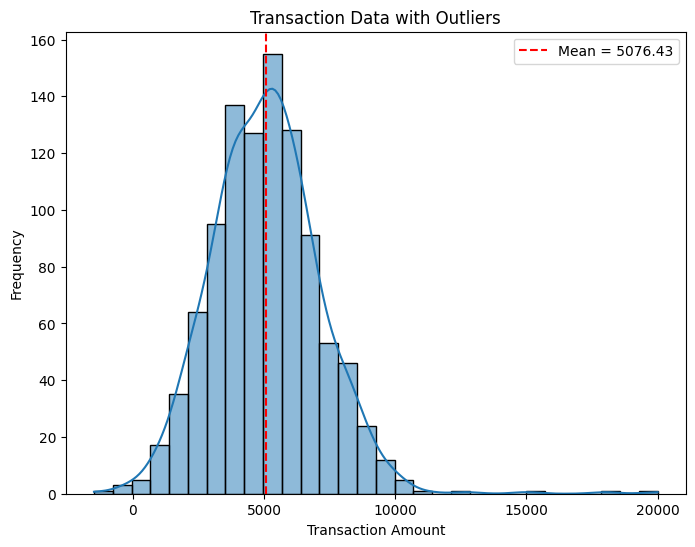

In [43]:
# Add extreme outliers
outliers = np.array([15000, 18000, 20000])
transactions_with_outliers = np.concatenate([transactions, outliers])

# Compute mean
mean_tx = np.mean(transactions_with_outliers)

# Plot histogram with mean line
plt.figure(figsize=(8, 6))
sns.histplot(transactions_with_outliers, bins=30, kde=True)

plt.axvline(mean_tx, color="red", linestyle="--", label=f"Mean = {mean_tx:.2f}")

plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.title("Transaction Data with Outliers")
plt.legend()
plt.show()


In [44]:
# Compute mean and standard deviation
mean_tx = np.mean(transactions_with_outliers)
std_tx = np.std(transactions_with_outliers)

# 3-sigma bounds
lower_bound = mean_tx - 3 * std_tx
upper_bound = mean_tx + 3 * std_tx

# Identify outliers
detected_outliers = transactions_with_outliers[
    (transactions_with_outliers < lower_bound) |
    (transactions_with_outliers > upper_bound)
]

print(f"Mean: {mean_tx:.2f}")
print(f"Std Dev: {std_tx:.2f}")
print(f"Lower Bound (3σ): {lower_bound:.2f}")
print(f"Upper Bound (3σ): {upper_bound:.2f}\n")

print("Detected Outliers:")
detected_outliers


Mean: 5076.43
Std Dev: 2075.65
Lower Bound (3σ): -1150.52
Upper Bound (3σ): 11303.39

Detected Outliers:


array([12705.46298131, -1482.53468014, 15000.        , 18000.        ,
       20000.        ])

## Part C: Sampling Distribution


In [45]:
# 7) Simulate a salary population with an exponential distribution (scale=50000, size=10000).
# 8) Draw 5000 samples of size 30 (no replacement) and compute each sample mean.
# 9) Plot the sampling distribution and compare the sample mean vs population mean.


In [46]:
# Simulate salary population (exponential distribution)
np.random.seed(42)
salary_population = np.random.exponential(scale=50000, size=10000)

# Preview
salary_population[:10]


array([ 23463.40449884, 150506.07154588,  65837.28467727,  45647.1276888 ,
         8481.24352312,   8479.81459573,   2991.93843043, 100561.543224  ,
        45954.10768136,  61562.50308523])

In [47]:
# Draw samples and compute sample means
sample_means = []

for _ in range(5000):
    sample = np.random.choice(salary_population, size=30, replace=False)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# Preview
sample_means[:10]


array([49253.13057547, 53081.76935757, 40899.45780517, 37218.13300927,
       54796.26892222, 36338.55769997, 58653.09317174, 72579.55261576,
       54022.03936632, 41802.91992135])

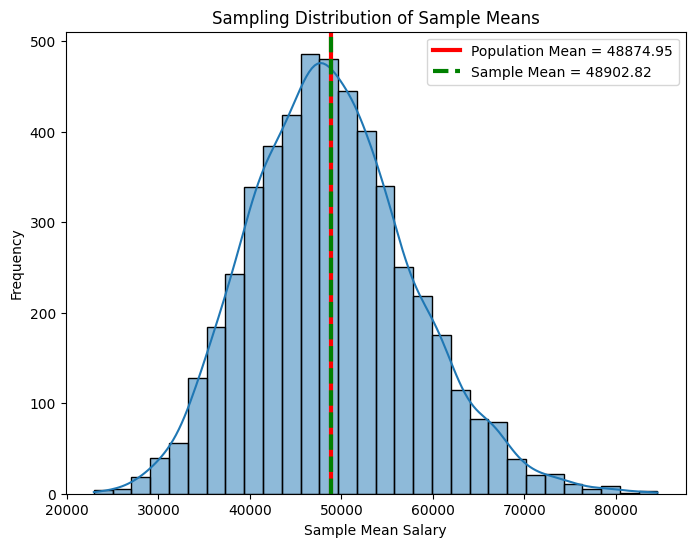

(np.float64(48874.94773451174), np.float64(48902.82243539534))

In [48]:
# Compute population mean and sample mean
population_mean = np.mean(salary_population)
sample_mean = np.mean(sample_means)

# Plot sampling distribution
plt.figure(figsize=(8, 6))
sns.histplot(sample_means, bins=30, kde=True)

# Plot vertical lines
plt.axvline(population_mean, color="red", linestyle="-", linewidth=3,
            label=f"Population Mean = {population_mean:.2f}")

plt.axvline(sample_mean, color="green", linestyle="--", linewidth=3,
            label=f"Sample Mean = {sample_mean:.2f}")


plt.xlabel("Sample Mean Salary")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Sample Means")
plt.legend()
plt.show()

population_mean, sample_mean


## Part D: Boxplot and IQR Filtering


In [49]:
# 10) Create a boxplot of sample means from Part C.
# 11) Filter outliers using the IQR rule (1.5*IQR) and re-plot the boxplot.


First 10 sample means:
[49253.13057547 53081.76935757 40899.45780517 37218.13300927
 54796.26892222 36338.55769997 58653.09317174 72579.55261576
 54022.03936632 41802.91992135]

Total number of sample means:
5000


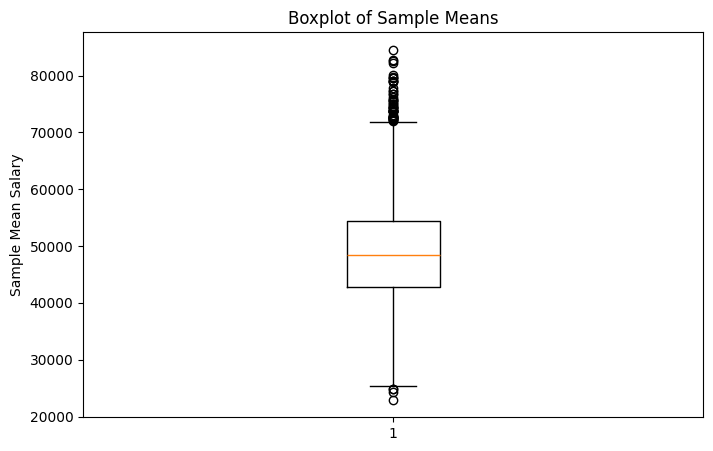

In [50]:
# Sanity check
print("First 10 sample means:")
print(sample_means[:10])

print("\nTotal number of sample means:")
print(len(sample_means))

# Boxplot
plt.figure(figsize=(8, 5))
plt.boxplot(sample_means)
plt.title("Boxplot of Sample Means")
plt.ylabel("Sample Mean Salary")
plt.show()


In [51]:
#(Q1,Q3 and IQR)
# Calculate quartiles 
Q1 = np.percentile(sample_means, 25)
Q3 = np.percentile(sample_means, 75)
IQR = Q3 - Q1

# IQR bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")


Q1: 42706.08
Q3: 54381.63
IQR: 11675.55
Lower Bound: 25192.76
Upper Bound: 71894.96


In [52]:
#FILTER OUTLIERS
filtered_sample_means = sample_means[
    (sample_means >= lower_bound) &
    (sample_means <= upper_bound)
]

print("Original count:", len(sample_means))
print("After IQR filtering:", len(filtered_sample_means))


Original count: 5000
After IQR filtering: 4944


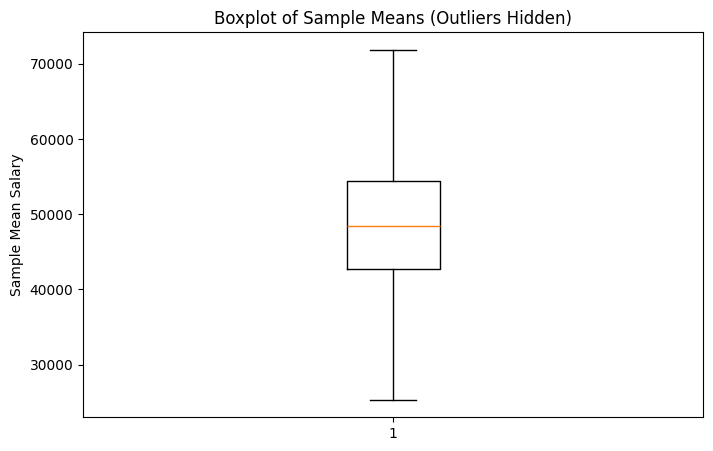

In [53]:
#Replotting box plot
plt.figure(figsize=(8, 5))
plt.boxplot(sample_means, showfliers=False)
plt.title("Boxplot of Sample Means (Outliers Hidden)")
plt.ylabel("Sample Mean Salary")
plt.show()


## Part E: Q-Q Plot and Transformations


In [54]:
# 12) Create a Q-Q plot of the salary population vs normal distribution.
# 13) Apply a log transform and re-plot the histogram.
# 14) Apply Box-Cox transform, show fitted lambda, and plot histogram.


First 10 salary values:
[ 23463.40449884 150506.07154588  65837.28467727  45647.1276888
   8481.24352312   8479.81459573   2991.93843043 100561.543224
  45954.10768136  61562.50308523]

Population mean: 48874.94773451174
Population std: 48717.79927189377


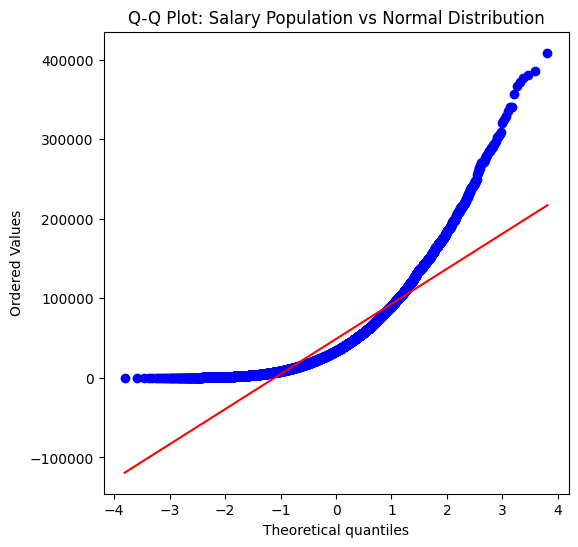

In [55]:
# Sanity check
print("First 10 salary values:")
print(salary_population[:10])

print("\nPopulation mean:", np.mean(salary_population))
print("Population std:", np.std(salary_population))

# Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(salary_population, dist="norm", plot=plt)
plt.title("Q-Q Plot: Salary Population vs Normal Distribution")
plt.show()


First 10 log-transformed salaries:
[10.06319723 11.9217587  11.09494159 10.72869596  9.04561236  9.04544386
  8.00367676 11.51852519 10.73539852 11.02780825]

Mean of log-transformed salaries: 10.220509513064087
Std of log-transformed salaries: 1.2834004318347914


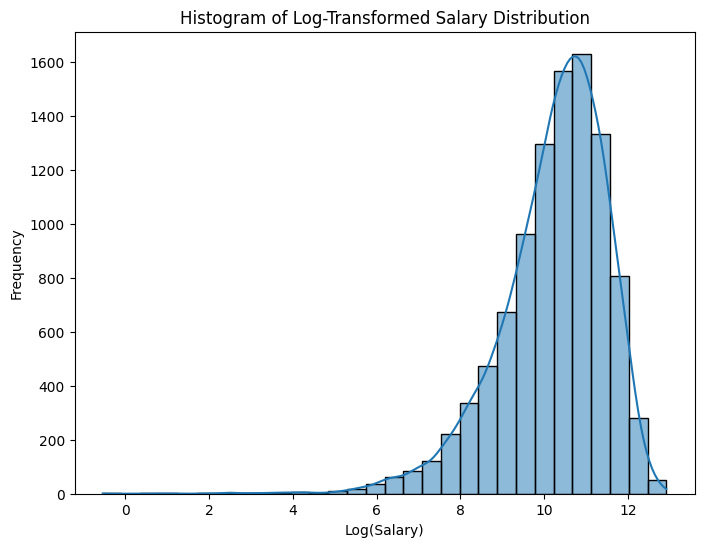

In [56]:
# Log transform (salary values are > 0, so this is safe)
log_salary = np.log(salary_population)

# Sanity check
print("First 10 log-transformed salaries:")
print(log_salary[:10])

print("\nMean of log-transformed salaries:", np.mean(log_salary))
print("Std of log-transformed salaries:", np.std(log_salary))

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(log_salary, bins=30, kde=True)

plt.xlabel("Log(Salary)")
plt.ylabel("Frequency")
plt.title("Histogram of Log-Transformed Salary Distribution")
plt.show()


## Part F: Short Answers


Answer briefly in Markdown:
1) Did the sampling distribution look more normal than the original salary distribution? Why?
2) Which transformation (log vs Box-Cox) looked more normal? What visual evidence supports this?


1.Yes, Sampling Distribution look more normal. From Central limit theorem we can know that for a sufficiently large sample size the distribution the distribution of sample means approaches a normal distribution regardless of the shape of the population distribution.

2.The Box-Cox transformation appeared more normal than the log transformation. This is supported by the histogram of the Box-Cox transformed data being more symmetric and bell-shaped and the KDE curve aligning more closely with a normal distribution compared to the log-transformed data.